# CTGAN, introduction

This notebook extensively uses the CTGAN codes in https://github.com/DAI-Lab/CTGAN. 

## Step 1: Prepare your data

In [1]:
import sys
# Clone https://github.com/DAI-Lab/CTGAN
# Add path here:
sys.path.append('/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN')

In [2]:
from ctgan.data import read_csv

In [3]:
# Path to CSV and JSON files
# The Metadata file will be in JSON format, containing an entry called columns, with a list of sub-documents containing both the name of the column and its type.
# **Column types can be continuous for continuous columns and categorical, ordinal or discrete for non-continuous columns.**

"""
Simple code to generate isg_region2.json file for ONS dataset:
for mycol in ["caseno","country","region","add1yr","age","agehrp","aggdtwpew11g","ahchuk11","carer","carsnoc","cenheat","clients01","clients02","clients03","clients04","clients05","clients06","clients07","clients08","clients09","clients10","clients11","clients12","clients13","clients14","clients15","clients16","clients17","clients18","clients19","clients20","clients21","cobg","cobhukrc","concealed","depedhuk11","depemhuk11","dephdhuk11","dephshuk11","deprived","disability","dpcfamuk11","ecopuk","empstat","estnaturei","ethhuk11","ethnicityew","everwork","fmspuk11","health","hhldlang11","hlqupuk11","hours","housecarer","identity","illhuk11g","indgpuk11","intention","iscog","landlordew","langprf","larpuk","lastyrwrkg","mainglangg","marstat","meighuk11","mighuk11","mltrlg","movefromg","moveregion","natidbpuk11","natidepuk11","natidipuk11","natidnipuk11","natidopuk11","natidspuk11","natidwpuk11","nssec","nsshuk11","occg","passports","penexactpuk11","penhuk11","penpuk11","popbasesec","position","pproomhuk11","psptelog","relato","religionew","residtype","rtntypeg","samesex","scaddtyp","scghuk11","scgpuk11c","selfcon","sex","single","sizhuk","socmin","sscaddcpew11","stapuk11","student","supervisor","tenduk11","tenure","transport","typaccom","unemphist","visitorsg","wg1famuk11","wkpladdewni","wlshread","wlshspeak","wlshstnd","wlshwrit","wpzhome","wrkplaceew","yradindstud","yrarryearg"
]:
    print("{")
    print(f'    "name": "{mycol}",')
    print('    "type": "categorical"')
    print("},")
"""


# Adult census data
#csv_filename="/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN/examples/csv/adult.csv"
#meta_filename="/Users/khosseini/myJobs/ATI/Projects/2019/QUIPP/CTGAN/examples/csv/adult.json"

csv_filename="./data/UKDA-7605-csv/csv/isg_regionv2.csv"
meta_filename="./data/UKDA-7605-csv/csv/isg_region2.json"

num_samples_from_data = 1000         # None: use all
num_syn_samples_to_generate = 1000   
random_state = 10

num_epochs = 5

In [4]:
data, discrete_columns = read_csv(csv_filename=csv_filename, meta_filename=meta_filename)

In [5]:
print(f"[INFO] Data has {len(data)} columns, read from {csv_filename}")

[INFO] Data has 2848155 columns, read from ./data/UKDA-7605-csv/csv/isg_regionv2.csv


In [6]:
if num_samples_from_data:
    print(f"[INFO] Sample {num_samples_from_data} from data!")
    data_sample = data.sample(n=num_samples_from_data, 
                              random_state=random_state)
else:
    data_sample = data

[INFO] Sample 1000 from data!


In [16]:
print(data_sample.describe())

             caseno      country       region       add1yr          age  \
count  1.000000e+03  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1.426171e+06     1.049000     5.998000     0.869000    39.316000   
std    8.112615e+05     0.215976     3.029385     1.818556    22.956026   
min    6.430000e+03     1.000000     1.000000    -9.000000     0.000000   
25%    7.488935e+05     1.000000     3.000000     1.000000    20.750000   
50%    1.408180e+06     1.000000     6.000000     1.000000    39.000000   
75%    2.110063e+06     1.000000     9.000000     1.000000    56.000000   
max    2.839108e+06     2.000000    11.000000     4.000000    90.000000   

            agehrp  aggdtwpew11g     ahchuk11        carer      carsnoc  ...  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     47.643000     -2.902000     6.228000     1.004000     1.153000  ...   
std      17.666456      6.692323     3.530507     1.388493     1.812975  ...   
min 

In [7]:
print(discrete_columns)

['caseno', 'country', 'region', 'add1yr', 'age', 'agehrp', 'aggdtwpew11g', 'ahchuk11', 'carer', 'carsnoc', 'cenheat', 'clients01', 'clients02', 'clients03', 'clients04', 'clients05', 'clients06', 'clients07', 'clients08', 'clients09', 'clients10', 'clients11', 'clients12', 'clients13', 'clients14', 'clients15', 'clients16', 'clients17', 'clients18', 'clients19', 'clients20', 'clients21', 'cobg', 'cobhukrc', 'concealed', 'depedhuk11', 'depemhuk11', 'dephdhuk11', 'dephshuk11', 'deprived', 'disability', 'dpcfamuk11', 'ecopuk', 'empstat', 'estnaturei', 'ethhuk11', 'ethnicityew', 'everwork', 'fmspuk11', 'health', 'hhldlang11', 'hlqupuk11', 'hours', 'housecarer', 'identity', 'illhuk11g', 'indgpuk11', 'intention', 'iscog', 'landlordew', 'langprf', 'larpuk', 'lastyrwrkg', 'mainglangg', 'marstat', 'meighuk11', 'mighuk11', 'mltrlg', 'movefromg', 'moveregion', 'natidbpuk11', 'natidepuk11', 'natidipuk11', 'natidnipuk11', 'natidopuk11', 'natidspuk11', 'natidwpuk11', 'nssec', 'nsshuk11', 'occg', 'pa

## Step 2: Fit CTGAN to your data

In [8]:
from ctgan.synthesizer import CTGANSynthesizer

In [9]:
ctgan = CTGANSynthesizer()

In [10]:
print(ctgan)

In [11]:
print(f"[INFO] Start fitting the model, total number of epochs: {num_epochs}")

[INFO] Start fitting the model, total number of epochs: 5


In [12]:
ctgan.fit(data_sample, discrete_columns, epochs=num_epochs)

Epoch 1, Loss G: 1.9889, Loss D: -0.3012
Epoch 2, Loss G: 2.4794, Loss D: -1.2935
Epoch 3, Loss G: 2.9881, Loss D: -2.7709
Epoch 4, Loss G: 3.6559, Loss D: -4.2462
Epoch 5, Loss G: 4.1309, Loss D: -5.3237


Once the process has finished, all you need to do is call the sample method of your CTGANSynthesizer instance indicating the number of rows that you want to generate.

In [13]:
samples = ctgan.sample(10000)

In [15]:
print(samples.head())

    caseno  country  region  add1yr  age  agehrp  aggdtwpew11g  ahchuk11  \
0  1109542        1       8       1   52      46            11         6   
1  2766650        1      11       4   14      64             7        10   
2  2117737        1       5       1   37      56             8         7   
3  2391385        1       3       2   10      68             8         2   
4   180345        1       4       2   37      31            -9        -9   

   carer  carsnoc  ...  wg1famuk11  wkpladdewni  wlshread  wlshspeak  \
0      1        1  ...           1            2        -9         -9   
1      4        3  ...           0            4        -9         -9   
2      1        4  ...           0            3         0         -9   
3      1        2  ...          -9            2        -9          1   
4      4        2  ...           2           -9         0         -9   

   wlshstnd  wlshwrit  wpzhome  wrkplaceew  yradindstud  yrarryearg  
0         1         1       -9          

NOTE: CTGAN does not distinguish between float and integer columns, which means that it will sample float values in all cases. If integer values are required, the outputted float values must be rounded to integers in a later step, outside of CTGAN.

## Simple evaluation

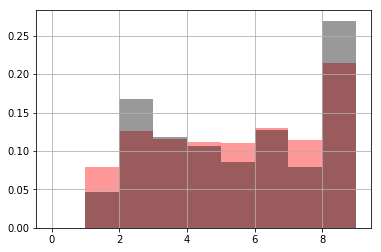

In [18]:
samples['region'].hist(density=True, alpha=0.4, bins=range(0, 10), color='r')
data_sample['region'].hist(density=True, alpha=0.4, bins=range(0, 10), color='k')